## Titanic Notebook


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import csv
import pip 

In [2]:
gender_submission = pd.read_csv('data/gender_submission.csv')

In [3]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
gender_submission.shape

(418, 2)

In [5]:
train = pd.read_csv('data/train.csv')

In [6]:
test = pd.read_csv('data/test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


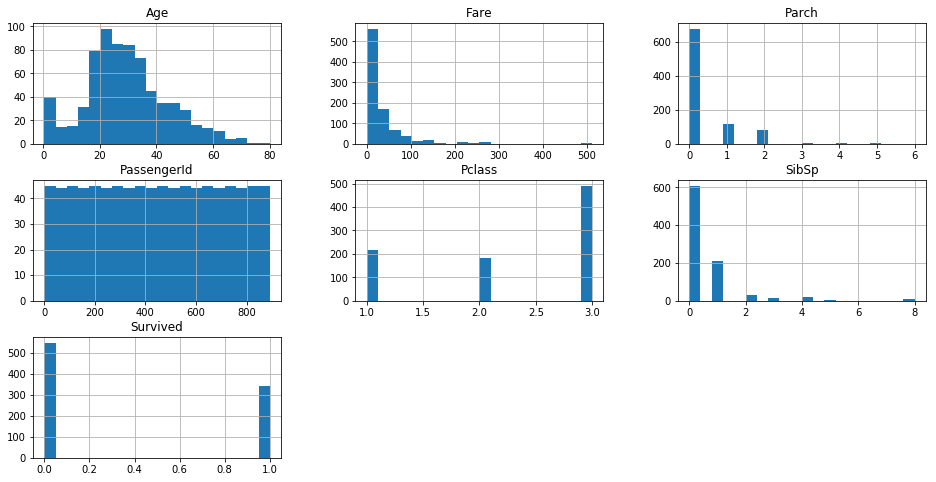

In [11]:
train.hist(bins=20, figsize=(16,8))
plt.show()

In [12]:
def plot_survival_per_feature(data, feature):
    grouped_by_survival = data[feature].groupby(data["Survived"])
    survival_per_feature = pd.DataFrame({"Survived": grouped_by_survival.get_group(0),
                                        "didnt_Survived": grouped_by_survival.get_group(1),
                                        })
    hist = survival_per_feature.plot.hist(bins=20, alpha=0.5)
    hist.set_xlabel(feature)
    plt.show()

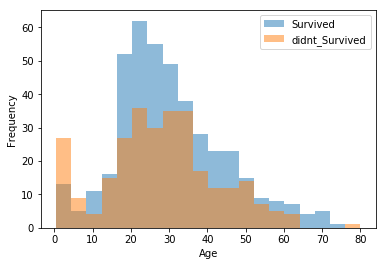

In [13]:
plot_survival_per_feature(train, "Age")

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
y = train['Survived']
x = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)


In [16]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [17]:
encoder = LabelEncoder()
x['Sex'] = encoder.fit_transform(x['Sex'])
print (x['Sex'])

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [18]:
x['Embarked'] = x['Embarked'].fillna('C')
x['Embarked'].isnull().sum()

0

In [19]:
encoder = LabelEncoder()
x['Embarked'] = encoder.fit_transform(x['Embarked'])

In [20]:
x['Embarked']

0      2
1      0
2      2
3      2
4      2
5      1
6      2
7      2
8      2
9      0
10     2
11     2
12     2
13     2
14     2
15     2
16     1
17     2
18     2
19     0
20     2
21     2
22     1
23     2
24     2
25     2
26     0
27     2
28     1
29     2
      ..
861    2
862    2
863    2
864    2
865    2
866    0
867    2
868    2
869    2
870    2
871    2
872    2
873    2
874    0
875    0
876    2
877    2
878    2
879    0
880    2
881    2
882    2
883    2
884    2
885    1
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [22]:
media= x["Age"].median()
print (media)

28.0


In [23]:
x['Age'] = x['Age'].astype(float)
x['Age'] = x["Age"].fillna(value = x['Age'].median())

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [25]:
dt = RandomForestClassifier(n_estimators= 11, max_depth=6)

In [26]:
dt = RandomForestClassifier(n_estimators= 11, max_depth=10, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=150)
dt.fit(xtrain, ytrain)
accuracy_score(ytest, dt.predict(xtest))

0.80000000000000004

In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
encoder = LabelEncoder()
test['Sex'] = encoder.fit_transform(test['Sex'])
print (test['Sex'])

0      1
1      0
2      1
3      1
4      0
5      1
6      0
7      1
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     1
26     0
27     1
28     1
29     1
      ..
388    1
389    1
390    1
391    0
392    1
393    1
394    1
395    0
396    1
397    0
398    1
399    1
400    0
401    1
402    0
403    1
404    1
405    1
406    1
407    1
408    0
409    0
410    0
411    0
412    0
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [29]:
encoder = LabelEncoder()
test['Embarked'] = encoder.fit_transform(test['Embarked'])

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [31]:
test['Age'] = test['Age'].fillna(value=test["Age"].median())

In [32]:
test['Fare'] = test['Fare'].fillna(value=test["Fare"].median())

In [33]:
test = test.drop(["Name",'Ticket','Cabin'], axis = 1)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [52]:
gender_submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [36]:
predi = dt.predict(test)

In [37]:
sub = pd.DataFrame()

## Sor far so Good! 

In [38]:
sub['PassengerId'] = test["PassengerId"]
sub['Survived'] = predi
sub.to_csv('submission.csv',index=False)

## Area de testes 

In [47]:
from sklearn.grid_search import GridSearchCV
from time import time

In [45]:
grid_times = {}
clf = RandomForestClassifier(random_state = 84)

In [53]:
for number in np.arange(1,15, 2):
    
    param = np.arange(1,number,10)
    param_grid = {"n_estimators": param,
                  "criterion": ["gini", "entropy"]}
    
    grid_search = GridSearchCV(clf, param_grid = param_grid)
    
    t0 = time()
    grid_search.fit(xtrain, ytrain)
    compute_time = time() - t0
    grid_times[len(grid_search.grid_scores_)] = time() - t0
    
grid_times = pd.DataFrame.from_dict(grid_times, orient = 'index')

ValueError: Parameter values for parameter (n_estimators) need to be a non-empty sequence.

In [39]:
def accuracy(ytrue, ypred):
    return (np.array(ytrue)==np.array(ypred)).mean()

In [40]:
ypred = dt.predict(xtest)
accuracy(ytest, ypred)

0.80000000000000004

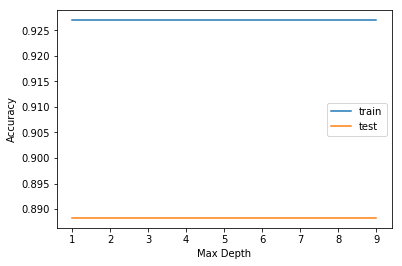

In [41]:
def plot_accs(values, accs_train, accs_test):
    plt.plot(values, accs_train, label='train')
    plt.plot(values, accs_test, label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Max Depth')
    plt.legend()


depths = list(range(1, 10))

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

train_accs = []
test_accs = []
for depth in depths:
    rf = RandomForestClassifier(random_state=1, max_depth=depth)
    rf.fit(xtrain, ytrain)
    ytest_pred = dt.predict(xtest)
    ytrain_pred = dt.predict(xtrain)
    
    test_accs.append(accuracy(ytest, ytest_pred))
    train_accs.append(accuracy(ytrain, ytrain_pred))
    
#     ...


plot_accs(depths, train_accs, test_accs)